In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d.axes3d import math
img=cv2.imread("/content/suga-agust-d-bts-hd-wallpaper-preview.jpg")

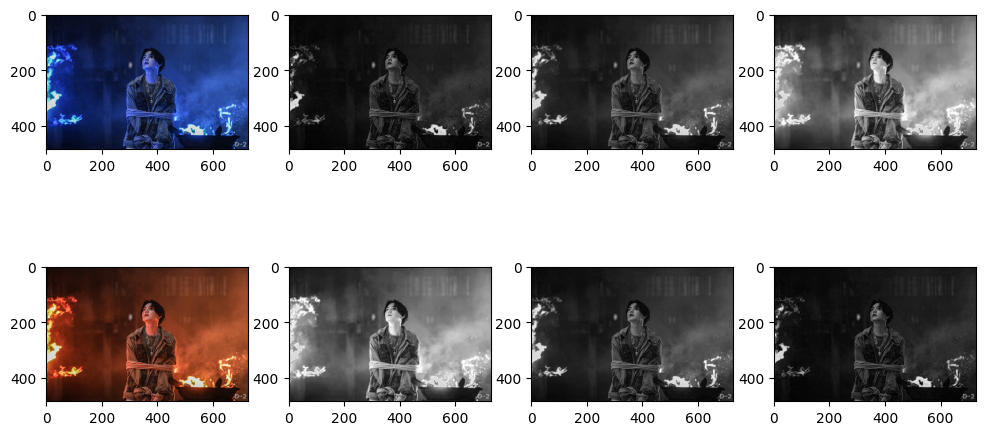

In [11]:

#1.1.1

fig=plt.figure(figsize=(12,12)) #บรรทัดนี้เป็นการกำหนดไซส์ของ ตางรางที่เราจะ plot รูปหรือกราฟเข้าไป
b=img[:,:,0]#เป็นการslide สีออกมาเป็น b,g,r ใช้แทน split
g=img[:,:,1]
r=img[:,:,2]
#display รูปภาพโดยการ plot ลงใน ตาราง

fig.add_subplot(1,4,1)
plt.imshow(img,cmap='gray')
#ขออธิบายในส่วนของภาพแรกที่อาจารย์ถามในคาบ ว่าทำไมถึงแสดงผลสีฟ้า เนื้องจากว่าเราแสดงผลโดยการเรียงภาพเป็น BGR
#ซึ่งภาพสีที่เราเห็นนั้นจะเกิดการเรียงซ้อนกันของสี ซึ่งที่แรกที่เราจะเก็นคือสี blue ภาพเลยเป็นสีแบบที่เห็นค่ะ
fig.add_subplot(1,4,2)
plt.imshow(b,cmap='gray')
fig.add_subplot(1,4,3)
plt.imshow(g,cmap='gray')
fig.add_subplot(1,4,4)
plt.imshow(r,cmap='gray')

img2=img.copy()
#เปเนการ convert จาก bgr->rgb
img2=img[:,:,::-1]
#เป็นการ slide สีออกมาเป็น r,g,b ใช้แทน split
r=img2[:,:,0]
g=img2[:,:,1]
b=img2[:,:,2]
#display รูปภาพโดยการ plot ลงใน ตาราง
fig.add_subplot(2,4,5)
plt.imshow(img2,cmap='gray')
#ส่วนภาพนี้เราจะแปลงกลับมาเป็น RGB ซึ่งก็คือภาพต้นฉบับที่ชั้นบนสุดของสีนั้นเป็นสีแดง
fig.add_subplot(2,4,6)
plt.imshow(r,cmap='gray')
fig.add_subplot(2,4,7)
plt.imshow(g,cmap='gray')
fig.add_subplot(2,4,8)
plt.imshow(b,cmap='gray')



In [12]:
print(img.shape)

(485, 728, 3)


In [14]:
#เป็นการประกาศตัวแปลและทำการTranslation picture
imgt=np.transpose(img)
print('Transpose',imgt.shape)
imgm=np.moveaxis(img,2,0)
print('Moveaxis',imgm.shape)
imgr=np.reshape(img,(3,485,728))
print('Reshape',imgr.shape)

Transpose (3, 728, 485)
Moveaxis (3, 485, 728)
Reshape (3, 485, 728)


Text(0.5, 1.0, 'R_Reshape')

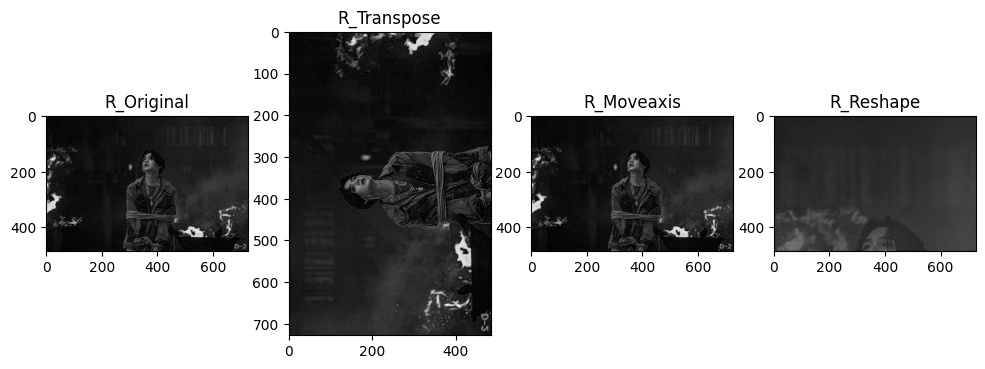

In [15]:
#1.1.2
#บรรทัดนี้เป็นการกำหนดไซส์ของ ตางรางที่เราจะ plot รูปหรือกราฟเข้าไป
fig=plt.figure(figsize=(12,12))
#
fig.add_subplot(2,4,1)
plt.imshow(b,cmap='gray')
plt.title('R_Original')
#การ "transpose" รูปภาพนี้จะเกิดการเปลี่ยนแปลงที่ทำให้ภาพแสดงผลโดยการพลิกภาพตามเส้นทแยงมุม
#การกระทำนี้เปลี่ยนแปลงแถวและคอลัมน์ของเมทริกซ์ของรูปภาพ ทิศทวนเข็มนาฬิกา 90 องศา
fig.add_subplot(2,4,2)
plt.imshow(imgt[0],cmap='gray')
plt.title("R_Transpose")
#การ "Moveaxis picture" คือการเปลี่ยนตำแหน่งแกนของรูปภาพ
fig.add_subplot(2,4,3)
plt.imshow(imgm[0],cmap='gray')
plt.title('R_Moveaxis')
#การ "Reshape"คือการเปลี่ยนรูปร่างของภาพตามความสูงเเละความกว้างตามที่เรากำหนด
fig.add_subplot(2,4,4)
plt.imshow(imgr[0],cmap='gray')
plt.title('R_Reshape')

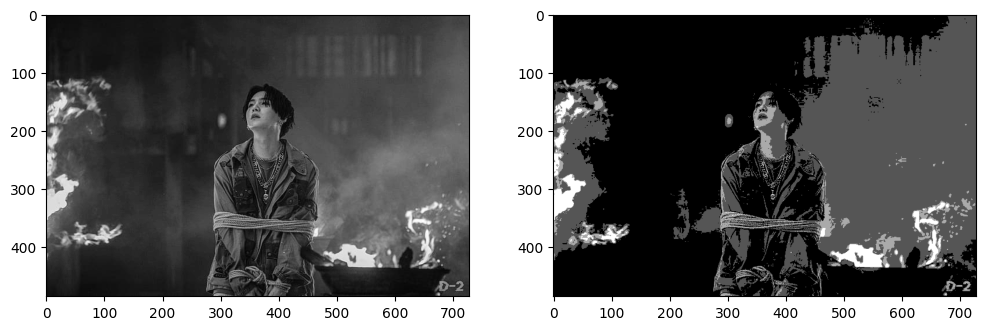

In [17]:
w = img.shape[0]
h = img.shape[1]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
arr_reduced = [[0]*h for i in range(w)]
cv2.imwrite('path/to/save/gray_image.jpg', gray_img)
for i in range(w):
  for j in range(h):
    q = math.floor((gray_img[i][j]/255)*(2**2))
    arr_reduced[i][j] = q
fig = plt.figure(figsize=(12,12))
fig.add_subplot(2,2,1)
plt.imshow(gray_img,cmap='gray')
fig.add_subplot(2,2,2)
plt.imshow(arr_reduced,cmap='gray')

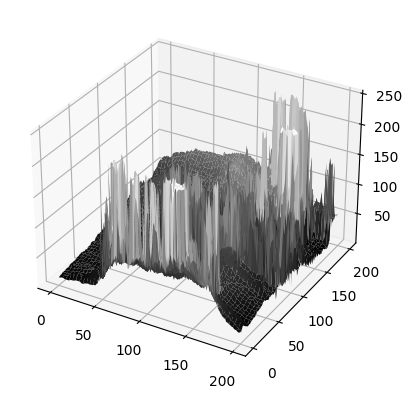

In [16]:
#1.1.4
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray_img,(200,200))
img_array = np.array(resized_img)
x,y = np.mgrid[0:img_array.shape[0],0:img_array.shape[1]]
fig = plt.figure()
axis = fig.add_subplot(111,projection='3d')
axis.plot_surface(x,y,resized_img, cmap='gray')
elev1 = 45
azim1 = 10
axis.view_init(elev=elev1 ,azim=azim1)
plt.show()